In [1]:
#
#
#
#
#
# iris dataset classification by svm.SVC() with various type of graph
#
#
#
#
#

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# import some data to play with
iris = datasets.load_iris()

In [4]:
X = iris.data[:, :2]  # we only take the first two features. We could

In [5]:
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [6]:
h = .02  # step size in the mesh

In [7]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

In [8]:
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

In [9]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

In [10]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
lin_svc = svm.LinearSVC(C=C).fit(X, y)

C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
sigmoid_svc_1 = svm.SVC(kernel='sigmoid').fit(X, y)

C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

In [14]:
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [15]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [16]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel']

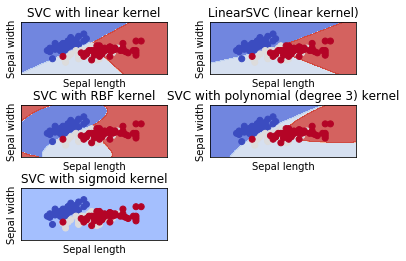

In [17]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc, sigmoid_svc_1)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


In [18]:
#
#
#
#
#
# sample data classification and produce various type of 2d graph and one 3d graph
#
#
#
#
#


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC # "Support vector classifier"
# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs

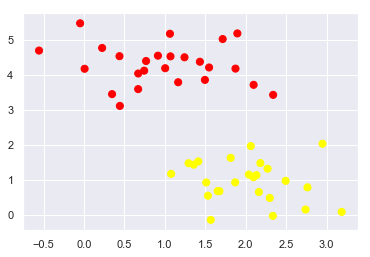

In [20]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.show()

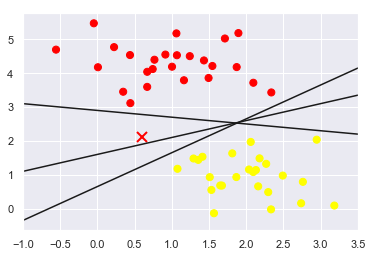

In [21]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

plt.show()


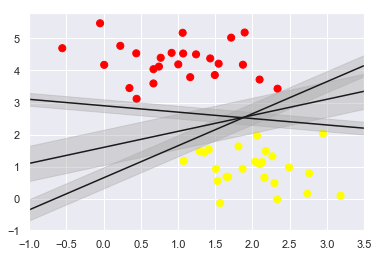

In [22]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

plt.show()


In [23]:
from sklearn.svm import SVC # "Support vector classifier"

In [24]:
model = SVC(kernel='linear', C=1E10)

In [25]:
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    #Plot the decision function for a 2D SVC
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


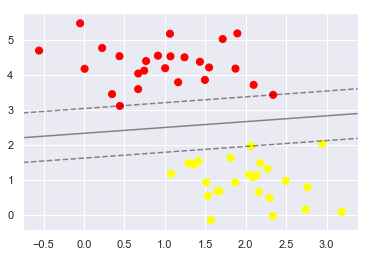

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

plt.show()

In [29]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [30]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)


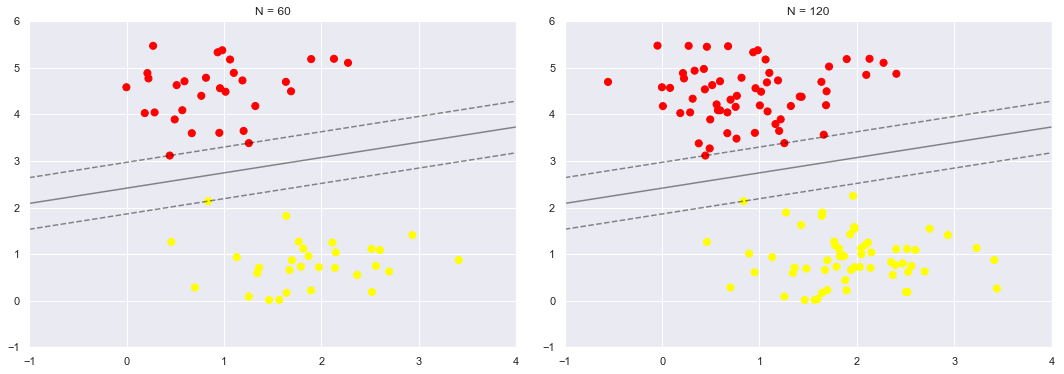

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

plt.show()


In [32]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d


from sklearn.datasets.samples_generator import make_circles


interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widgetâ€¦

In [33]:
X, y = make_circles(100, factor=.1, noise=.1)

In [34]:
clf = SVC(kernel='linear').fit(X, y)

In [35]:
r = np.exp(-(X ** 2).sum(1))

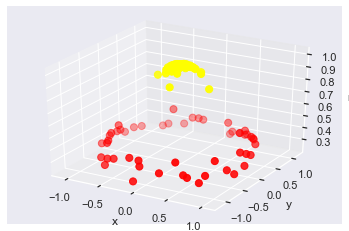

In [36]:
#def plot_3D(elev=30, azim=30, X=X, y=y):
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
#ax.view_init(elev=elev, azim=azim)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

#interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y))

plt.show()

In [38]:
clf = SVC(kernel='rbf', C=1E6)

In [39]:
clf.fit(X, y)

C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

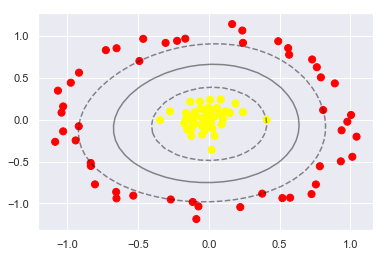

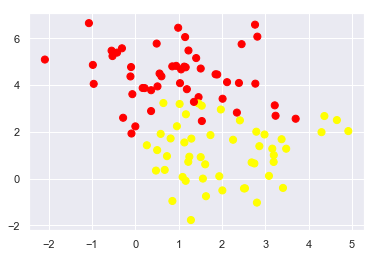

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

plt.show()

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.show()

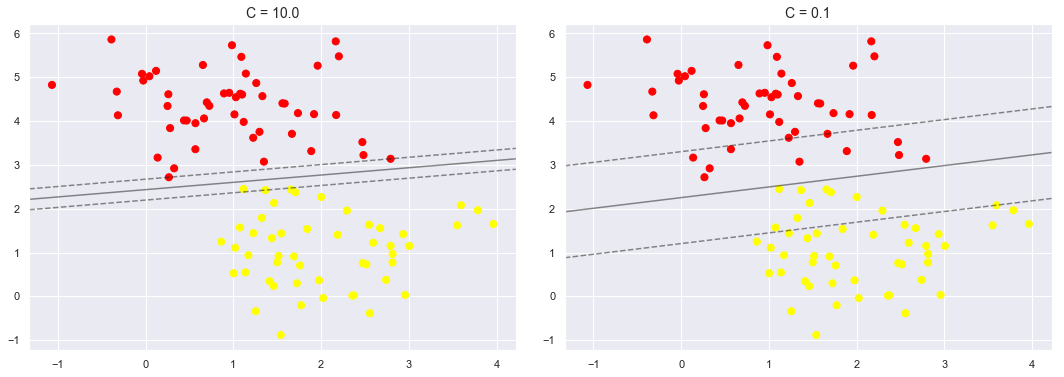

In [41]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

plt.show()


In [42]:
#
#
#
#
#
# Face Recognition by
#
#
#
#
#

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from IPython.display import display
from PIL import Image
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [44]:
faces = fetch_lfw_people(min_faces_per_person=60)
#print(faces.target_names)
#print(faces.images.shape)

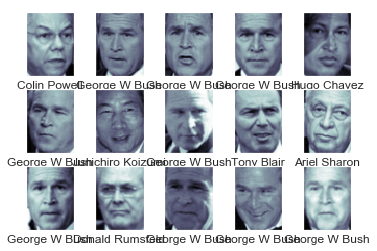

In [45]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])


plt.show()

In [48]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [49]:
pca = PCA(n_components=150, whiten=True, random_state=42)

In [53]:
svc = SVC(kernel='rbf', class_weight='balanced')


In [54]:
model = make_pipeline(pca, svc)

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [58]:
from sklearn.model_selection import GridSearchCV


In [59]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}


In [60]:
grid = GridSearchCV(model, param_grid)

In [61]:
grid.fit(Xtrain, ytrain)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [63]:
model = grid.best_estimator_

In [64]:
yfit = model.predict(Xtest)

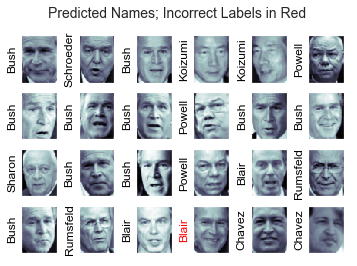

In [65]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

plt.show()

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [68]:
from sklearn.metrics import confusion_matrix


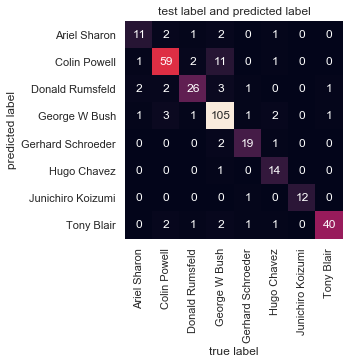

In [69]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("test label and predicted label")
plt.show()


In [72]:
#
#
#
#
#
# svm by regression on iris data
#
#
#
#
#

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [74]:
# import some data to play with
iris = datasets.load_iris()


In [75]:
X = iris.data[:, :2]  # we only take the first two features. We could


In [76]:
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [77]:
h = .02  # step size in the mesh



In [78]:
svm_regression_1 = svm.SVR().fit(X, y)

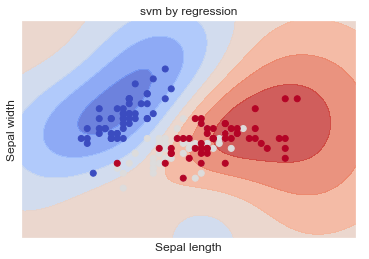

In [79]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
title_1 = ['svm by regression']

clf = svm_regression_1
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(title_1[0])

plt.show()

In [80]:
#
#
#
#
#
# svm by regression on sample data
#
#
#
#
#

In [81]:
# importing scikit learn with make_blobs
from sklearn.datasets.samples_generator import make_blobs
# import support vector regression
from sklearn.svm import SVR

In [82]:
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)

In [83]:
svm_regression_1 = SVR()

In [84]:
# fitting x samples and y classes
svm_regression_1.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
print(svm_regression_1.predict([[6,3]]))

[0.51804959]


In [86]:
X = [[6, 3], [1.9, 0]]

In [87]:
Y = [1.9, 3.6]

In [88]:
svm_regression_1.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
print(svm_regression_1.predict([[3,6]]))

[2.74990745]


In [90]:
#
#
#
#
#
# svm svc by custom kernel on iris dataset
#
#
#
#
#

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [92]:
# import some data to play with
iris = datasets.load_iris()

In [93]:
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset

In [94]:
Y = iris.target

In [95]:
def svm_by_custom_kernel(X, Y):

    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)

In [96]:
# we create an instance of SVM and fit out data.
svm_svc_classifier_by_custom_kernel_1 = svm.SVC(kernel=svm_by_custom_kernel)

In [97]:
svm_svc_classifier_by_custom_kernel_1.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function svm_by_custom_kernel at 0x000000E55DEC07B8>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
print(svm_svc_classifier_by_custom_kernel_1.predict([[6.3, 3.6]]))

[2]


In [99]:


#
#
#
#
#
# svm svc by gram matrix on numpy array
#
#
#
#

In [100]:
import numpy as np
from sklearn import svm

In [101]:
X = np.array([[0, 0], [1, 1]])

In [102]:
y = [0, 1]

In [103]:
clf = svm.SVC(kernel='precomputed')

In [104]:
gram = np.dot(X, X.T)

In [105]:
clf.fit(gram, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [106]:
print(clf.predict(gram))

[0 1]


In [107]:
#
#
#
#
#
# svm svc on digit detection dataset
#
#
#
#
#

In [108]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [109]:
digits = datasets.load_digits()

In [110]:
clf = svm.SVC(gamma=0.001, C=100)

In [111]:
X, y = digits.data, digits.target

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [113]:
clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
y_pred = clf.predict(X_test)

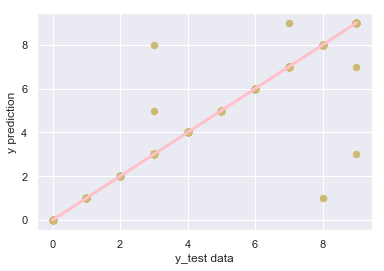

In [115]:
fig, ax = plt.subplots()

# print("y_test: \n {}".format(y_test))

# print("y_pred \n {}".format(y_pred))

ax.scatter(y_test, y_pred, color = "y", s = 42)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = "pink", linewidth = 3)
ax.set_xlabel("y_test data")
ax.set_ylabel("y prediction")
plt.show()

In [116]:
print(" \n Classification report for classifier {}:  \n \n {}\n".format("SVC", metrics.classification_report(y_test, y_pred)))

 
 Classification report for classifier SVC:  
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        52
           3       0.98      0.96      0.97        56
           4       1.00      1.00      1.00        64
           5       0.99      1.00      0.99        73
           6       1.00      1.00      1.00        57
           7       0.98      0.98      0.98        62
           8       0.98      0.98      0.98        52
           9       0.99      0.97      0.98        68

   micro avg       0.99      0.99      0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594




In [117]:
print("Confusion matrix:\n {}".format(metrics.confusion_matrix(y_test, y_pred)))

Confusion matrix:
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  1  0  0  1  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0 73  0  0  0  0]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  0  0  1  0 66]]


In [119]:
print("accuracy score:  {}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:  0.98989898989899
